In [1]:
CALI_PROCESSED = r"..\..\data\processed\texas_auto_processed.csv"
REPO_DIR = r"C:\Users\grego\Documents\GitHub\DS440CapstoneIndubitably"
MODEL_FP = r"C:\Users\grego\Documents\GitHub\DS440CapstoneIndubitably\models\knn_model.pkl"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append(REPO_DIR)
from app_new.feature_engineering import DemoClassifier
from dataclasses import dataclass
import numpy as np

@dataclass
class Feature:
    data: pd.DataFrame | np.ndarray
    col: str
    type: str
    models: dict | None
    params: dict | None

    def __str__(self):
        return f"{self.type} ({self.col}) - {self.params}"

    __repr__ = __str__

In [3]:
cali = pd.read_csv(CALI_PROCESSED)
cali.head()

,review_id,listing_id,description,comments,sentiment,label,name,amenities
0,83097,5456,"['fabulous', 'location', 'walking', 'conventio...","['sylvia', 'very', 'nice', 'informal', 'relaxe...",4.333333,good,"['walk', '6th', 'rainey', 'st', 'convention', ...","['TV', 'Wifi', 'Air conditioning', 'Kitchen', ..."
1,133337,5456,"['fabulous', 'location', 'walking', 'conventio...","['sylvia', 'picked', 'airport', 'gave', 'beaut...",4.000000,good,"['walk', '6th', 'rainey', 'st', 'convention', ...","['TV', 'Wifi', 'Air conditioning', 'Kitchen', ..."
2,150928,5456,"['fabulous', 'location', 'walking', 'conventio...","['lovely', 'time', 'enjoyed', 'apartment', 'cl...",3.000000,good,"['walk', '6th', 'rainey', 'st', 'convention', ...","['TV', 'Wifi', 'Air conditioning', 'Kitchen', ..."
3,2706775,5456,"['fabulous', 'location', 'walking', 'conventio...","['sylvia', 'excellent', 'host', 'stayed', 'tou...",4.500000,good,"['walk', '6th', 'rainey', 'st', 'convention', ...","['TV', 'Wifi', 'Air conditioning', 'Kitchen', ..."
4,8602878,5456,"['fabulous', 'location', 'walking', 'conventio...","['place', 'cute', 'little', 'self', 'contained...",4.000000,good,"['walk', '6th', 'rainey', 'st', 'convention', ...","['TV', 'Wifi', 'Air conditioning', 'Kitchen', ..."


In [4]:
# import pickle

# model = pickle.load(open(MODEL_FP, "rb"))

# fp = r"C:\Users\grego\Documents\GitHub\DS440CapstoneIndubitably\data\features\features_texas_florida.pkl"
# features = pickle.load(open(fp, "rb"))

# model_feature = [f for f in model["combo"] if f.col == "comments" and f.type == "pca"][0]

# target_feature = [f for f in features if f.col == "comments" and f.type == "pca" and f.params == model_feature.params][0]

# target_feature




In [5]:
clf = DemoClassifier(MODEL_FP)
y_pred, probabilities = clf.predict_all_processed(cali)
y_pred = pd.Series(y_pred)

Loading models...
Predicting on 978 rows...
Processing row 1 of 978...
Generating amenities features...
Generating embedding features...
Generating pca features...
...without amenities
...without amenities
Processing row 2 of 978...
Generating amenities features...
Generating embedding features...
Generating pca features...
...without amenities
...without amenities
Processing row 3 of 978...
Generating amenities features...
Generating embedding features...
Generating pca features...
...without amenities
...without amenities
Processing row 4 of 978...
Generating amenities features...
Generating embedding features...
Generating pca features...
...without amenities
...without amenities
Processing row 5 of 978...
Generating amenities features...
Generating embedding features...
Generating pca features...
...without amenities
...without amenities
Processing row 6 of 978...
Generating amenities features...
Generating embedding features...
Generating pca features...
...without amenities
...wi

{'model': KNeighborsClassifier(leaf_size=10, n_neighbors=3), 'combo': (amenities (amenities) - {'corr_thresh': None, 'amenities': ['amenityall_kitchen', 'amenityall_garden', 'amenityall_microwave', 'amenityall_backyard', 'amenityall_iron', 'amenityall_shampoo', 'amenityall_wifi', 'amenityall_pool', 'amenityall_heating', 'amenityall_keypad', 'amenityall_refrigerator', 'amenityall_dog', 'amenityall_cat', 'amenityall_tv', 'amenityall_family', 'amenityall_internet', 'amenityall_patio', 'amenityall_washer', 'amenityall_dryer', 'amenityall_balcony', 'amenityall_stove', 'amenityall_breakfast', 'amenityall_dishwasher', 'amenityall_silverware', 'amenityall_bathtub', 'amenityall_lockbox', 'amenityall_crib', 'amenityall_elevator', 'amenityall_gym', 'amenityall_oven', 'amenityall_waterfront', 'amenityall_toilet']}, pca (comments) - {'n_components': 20, 'vector_size': 100}, pca (description) - {'n_components': 5, 'vector_size': 300})}
Californian accuracy: 6.24%


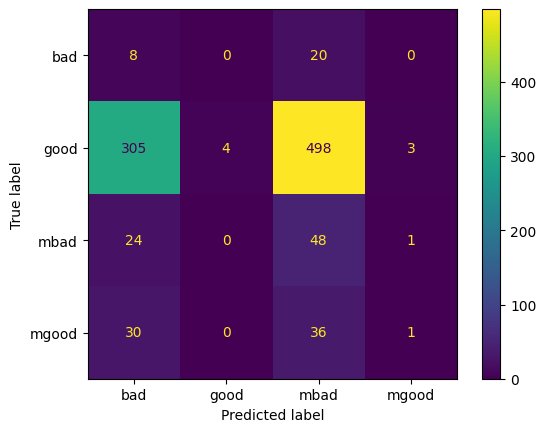

In [6]:
# plot a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = ConfusionMatrixDisplay.from_predictions(cali.label, y_pred)

# load model
with open(MODEL_FP, "rb") as f:
    model = pickle.load(f)

print(model)

# calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(cali.label, y_pred)
print(f"Californian accuracy: {accuracy:.2%}")

plt.show()